### Problem 2

#### (a)

Denote latent variable $\{ \pmb\mu_1, \cdots, \pmb\mu_n\}$ by $Z$.
$$
\hat{\alpha} = \arg\max_\alpha \log P(\mathcal{D};\alpha) =\arg\max_{\alpha}\sum_{i=1}^n \log p(\pmb y_i;\alpha)
$$

$$
\log p(\pmb y;\alpha) = \int p(\pmb y|\pmb \mu; \alpha) p(\pmb \mu;\alpha)d\pmb \mu\\
=\binom{N}{y_1 \cdots y_K}\frac{
\prod_{k=1}^K\Gamma(\alpha_k+y_k)
}{\Gamma(\alpha_1+\cdots\alpha_K+N)}\cdot \frac{\Gamma(\alpha_1+\cdots\alpha_K)}{
\prod_{k=1}^K\Gamma(\alpha_k)
}
$$

$$
\log P(\mathcal{D};\alpha) =
\sum_{i=1}^n\left\{
\log \binom{N}{y_{i,1} \cdots y_{i,K}} + \sum_{k=1}^K \sum_{z=0}^{y_{i,k}\ -1}\log(\alpha_k + z) 
- \sum_{z=0}^{N-1} \log(\alpha_1\cdots\alpha_K + z)
\right\}
$$

1\. Derive the complete-data loglikelihood:
$$
\log P(\mathcal{D}, \pmb \mu;\alpha) = \log P(\mathcal{D}|\pmb \mu;\alpha) + \log P(\pmb \mu;\alpha)\\
=\sum_{i=1}^n \log P(\pmb y_i |\pmb \mu_i;\alpha) + \sum_{i=1}^n \log P(\pmb \mu_i;\alpha)\\
=\sum_{i=1}^n \left\{
\sum_{k=1}^K y_{i,k} \log \mu_{i,k}+\log \binom{N}{y_{i,1} \cdots y_{i,K}}
+
\sum_{k=1}^K (\alpha_{k}-1)\log \mu_{i,k} + \log \frac{\Gamma(\sum_{k=1}^K \alpha_k)}{\prod_{k=1}^K\Gamma(\alpha_k)}
\right\}
$$

2\. E-step: Denote by $\alpha^t$ the $t$-th step estimation.
$$
Q(\alpha, \alpha^t)=
\mathbb{E}_{\pmb \mu|\mathcal{D}, \alpha^t}\left[\log P(\mathcal{D}, \pmb\mu; \alpha)\right]\\
=\sum_{i=1}^n \left\{
\mathbb{E}_{\pmb \mu_i|\pmb y_i;\alpha^t}\left[\sum_{k=1}^K y_{i,k} \log \mu_{i,k}\right]+\log \frac{N!}{y_{i,1}!\cdots, y_{i,K}!}
+\mathbb{E}_{\pmb \mu_i|\pmb y_i;\alpha^t}\left[
\sum_{k=1}^K (\alpha_{k}-1)\log \mu_{i,k} \right]+  \log \frac{\Gamma(\sum_{k=1}^K \alpha_k)}{\Gamma(\alpha_1)\cdots\Gamma(\alpha_K)}
\right\}
$$
where 
$$
\pmb \mu|\pmb y; \alpha\sim \text{Dir}(\pmb \mu; \alpha + \pmb y).
$$
Use the notation digamma function:
$$
\psi(x) = \frac{\Gamma'(x)}{\Gamma(x)},
$$
we can futher simplify $Q(\alpha, \alpha^t)$:

$$
Q(\alpha, \alpha^t) = \sum_{i=1}^n \log \binom{N}{y_{i,1} \cdots y_{i,K}} + \sum_{i=1}^n \sum_{k=1}^K(y_{i,k}+\alpha_k -1)
\psi(y_{i,k} + \alpha_k^t) 
-n(N+ \sum_{k=1}^K\alpha_k-K)\psi(N+\sum_{k=1}^K\alpha_k^t)
+ n\log \Gamma(\sum_{k=1}^K\alpha_k) - n\sum_{k=1}^K \log\Gamma(\alpha_k)
$$

3\. M-step: 
$$
\alpha^{t+1} = \arg\max_{\alpha} Q(\alpha, \alpha^t)
$$
Note that $\log\Gamma(\cdot)$ is convex, $Q$ is non-concave, 
thus this non-concave maximization problem cannot be solved in closed form.
$$ \\ $$
We shall apply Newton's method to solve it. Denote by $\alpha(m)$ the $m$-th iteration value in Newton's method. 
$$
\alpha(m+1)= \alpha(m) - H^{-1}(\alpha(m), \alpha^t) \cdot \nabla Q(\alpha(m), \alpha^t).
$$
where 
$$
[\nabla Q(\alpha, \alpha^t)]_k = \sum_{i=1}^n \psi(y_{i,k} + \alpha_k^t) - n\psi(N+\sum_{j=1}^K \alpha_j^t) + n\psi(\sum_{j=1}^K \alpha_j)-n\psi(\alpha_k)
$$
$$
[H(\alpha, \alpha^t)]_{k,k'} = n\phi(\sum_{j=1}^K \alpha_j ) - n\phi(\alpha_k)\pmb 1\left\{k=k'\right\}
$$
where $\phi(x) = \psi'(x)$.

$$
\\
$$

We can not guatantee that the EM algorithm converges to MLE $\hat{\alpha}$.
First, the loglikelihood $\log P(\mathcal{D}; \alpha)$ is not concave. Moreover, in M-step, the $Q(\alpha, \alpha^t)$ is not concave (noting that $\log \Gamma(\cdot)$ is convex and the objective function invloves evaluating $n\log \Gamma(\sum_{k=1}^K\alpha_k) - n\sum_{k=1}^K \log\Gamma(\alpha_k)$), either, thus we have to use other numerical method (e.g. Newton method) to solve it.

#### (b)

We follow the same procedure as (a). Denote $\beta = [\beta_1, \cdots, \beta_K]$. Then $\alpha_{i,j} = \exp(\beta_j^Tx_i)=\exp(x_i^T\beta_j)$

$$
\hat{\beta}=\arg\max_\beta \log P(\mathcal{D};\beta)
$$

1\. Derive the complete-data loglikelihood:
$$
\log P(\mathcal{D}, \pmb \mu;\beta) = \sum_{i=1}^n \log P(\pmb y_i |\pmb \mu_i) + \sum_{i=1}^n \log P(\pmb \mu_i;\beta)\\
=\sum_{i=1}^n \left\{
\sum_{k=1}^K y_{i,k} \log \mu_{i,k}+\log \binom{N}{y_{i,1} \cdots y_{i,K}}
+
\sum_{k=1}^K (\alpha_{i,k}-1)\log \mu_{i,k} + \log \frac{\Gamma(\sum_{k=1}^K \alpha_{i,k})}{\prod_{k=1}^K\Gamma(\alpha_{i,k})}
\right\}
$$

2\. E-step: Denote by $\beta^t$ the $t$-th step estimation.
$$
Q(\beta, \beta^t)=
\mathbb{E}_{\pmb \mu|\mathcal{D}, \alpha^t}\left[\log P(\mathcal{D}, \pmb\mu; \beta)\right]\\
=\sum_{i=1}^n \left\{
\mathbb{E}_{\pmb \mu_i|\pmb y_i;\alpha_i^t}\left[\sum_{k=1}^K y_{i,k} \log \mu_{i,k}\right]+\log \frac{N!}{y_{i,1}!\cdots, y_{i,K}!}
+\mathbb{E}_{\pmb \mu_i|\pmb y_i;\alpha_i^t}\left[
\sum_{k=1}^K (\alpha_{i,k}-1)\log \mu_{i,k} \right]+  \log \frac{\Gamma(\sum_{k=1}^K \alpha_{i,k})}{\prod_{k=1}^K\Gamma(\alpha_{i,k})}
\right\}
$$
where 
$$
\pmb \mu|\pmb y; \alpha\sim \text{Dir}(\pmb \mu; \alpha + \pmb y).
$$
Use the notation digamma function:
$$
\psi(x) = \frac{\Gamma'(x)}{\Gamma(x)},
$$
we can futher simplify $Q(\beta, \beta^t)$:

$$
Q(\beta, \beta^t) = \sum_{i=1}^n \log \binom{N}{y_{i,1} \cdots y_{i,K}} + \sum_{i=1}^n \sum_{k=1}^K(y_{i,k}+\alpha_{i,k} -1)
\left[
\psi(y_{i,k} + \alpha_{i,k}^t) 
- \psi(N+\sum_{j=1}^K\alpha_{i,j}^t)  
\right] 
+ \sum_{i=1}^n\log \Gamma(\sum_{k=1}^K\alpha_{i,k}) - \sum_{i=1}^n\sum_{k=1}^K \log\Gamma(\alpha_{i,k})
$$

3\. M-step: 
$$
\beta^{t+1} = \arg\max_{\beta} Q(\beta, \beta^t)
$$
We will apply Newton's method to solve it.
$$
\beta(m+1)= \beta(m) - H^{-1}(\beta(m), \beta^t) \cdot \nabla Q(\beta(m), \beta^t)
$$

4\. Newton's method. Recall the definition of our $\beta = [\beta_1, \cdots, \beta_K]$, (for convenience, a little bit confusing) and $\alpha_{i,k} = \exp(\beta_k^Tx_i)=\exp(x_i^T\beta_k)$

$$
\frac{\partial Q(\beta, \beta^t)}{\partial \beta_{k, p}} = \sum_{i=1}^n 
% \langle\frac{\partial Q}{\partial \alpha_{i}}, \frac{\partial \alpha_{i}}{\partial \beta_j}\rangle
\sum_{k'=1}^K \frac{\partial Q}{\partial \alpha_{i,k'}}\frac{\partial \alpha_{i,k'}}{\partial \beta_{k,p}}
=
\sum_{i=1}^n  \frac{\partial Q}{\partial \alpha_{i,k}}\frac{\partial \alpha_{i,k}}{\partial \beta_{k,p}}
:=\sum_{i=1}^n f_{i,k} g_{i,k,p}
$$
$$
f_{i,k}=\frac{\partial Q}{\partial \alpha_{i,k}} =  \psi(y_{i,k} + \alpha_{i,k}^t) - \psi(N+\sum_{k'=1}^K \alpha_{i,k'}^t) + \psi(\sum_{k'=1}^K \alpha_{i,k'})-\psi(\alpha_{i,k})
$$
$$
g_{i,k,p}=\frac{\partial \alpha_{i,k}}{\partial \beta_{k,p}} = e^{x_i^T\beta_k}\cdot x_{i,p}
$$

Define $\phi(x) = \psi'(x)$.

$$
\frac{\partial^2 Q(\beta, \beta^t)}{\partial \beta_{k, p}\partial \beta_{k', p'}}=\sum_{i=1}^n \frac{\partial f_{i,k}}{\partial \beta_{k',p'}}g_{i,k,p}+f_{i,k}\frac{\partial g_{i,k,p}}{\partial \beta_{k',p'}}
$$

$$
\frac{\partial f_{i,k}}{\partial \beta_{k',p'}} = \phi(\sum_{j=1}^K \alpha_{i,j}) g_{i, k', p'} - \phi(\alpha_{i,k}) g_{i,k,p'} \pmb 1\left\{k=k'\right\}
$$

$$
\frac{\partial g_{i,k,p}}{\partial \beta_{k',p'}} = x_{i,p}g_{i,k,p} \pmb 1\left\{k=k'\right\}
$$

After writing down this version of EM, we can find that it still can not efficiently generate the solution. 
The main reason is that we are facing at solving a non-convex optimization problem in the M-step. Calling Netwon-Raphson method will inevitably suffer from Hessian divergence and local optimum. Even we implement firs-order method, the learning rate need to be carefully tuned by a line search.

A more efficient algirthm is published by Y. Zhang, H. Zhou, W. Sun, Regression Models for Multivariate Count Data. 
Instead of using standard EM, they follow a minimization-maximization  priniciple and derive a lower bound of log-likelihood.

$$
\log P(\beta) =
\sum_{i=1}^n\left\{
\log \binom{N}{y_{i,1} \cdots y_{i,K}} + \sum_{k=1}^K \sum_{z=0}^{y_{i,k}\ -1}\log(\alpha_{i,k} + z) 
- \sum_{z=0}^{N-1} \log(\alpha_{i,1}\cdots\alpha_{i,K} + z)
\right\}
$$

Using Jensen's inequality and supporting hyperplane inequality yields the lower bound $g(\beta, \beta^t)$
$$
\log P(\beta^{t+1}) \geq g(\beta, \beta^t) \equiv \sum_{i=1}^n \sum_{k=1}^K\sum_{z=0}^{y_{i,k}\ -1} \frac{e^{x_i^T\beta_k^t}}{e^{x_i^T\beta_k^t}+z}x_i^T\beta_k - \sum_{i=1}^n \sum_{k=1}^K\sum_{z=0}^{N\ -1} \frac{e^{x_i^T\beta_k^t}}{\sum_{k'}e^{x_i^T\beta_{k'}^t}+z} + \text{const}
$$

It remains to maximize $g(\beta, \beta^t)$. This reduces to $k$ independent weighted Poisson regressions with weights and responses as follows:
$$
w_{i,k}^t = \sum_{z=0}^{N-1} (\sum_{k'}e^{x_i^T\beta_{k'}^t}+z)^{-1}
$$
$$
y_{i,k}^t =(w_{i,k}^t)^{-1}\left(
\sum_{z=0}^{y_{i,k}\ -1} \frac{e^{x_i^T\beta_k^t}}{e^{x_i^T\beta_k^t}+z}
\right)
$$

#### (c): Coding Part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [2]:
df = pd.read_csv("../data/data.txt", delimiter=' ')
Y = df[['Y1', 'Y2', 'Y3', 'Y4']].values
X = df[['X1', 'X2', 'X3', 'X4', 'X5']].values
K = 4 
N = 50 
p = 5
B = np.ones((p, K))

In [3]:
class DDM:
    '''
    Dirichlet Multinomial Regression
    '''
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.n, self.p = X.shape
        self.K = Y.shape[1]
        self.N = np.sum(Y[0,:])
    
    def loglikelihood(self, B):
        # without calculating the constant
        N = self.N 
        n = self.n
        K = self.K
        alpha = np.zeros((n, K))
        for i in range(n):
            for j in range(K):
                alpha[i, j] = np.exp(X[i,:].dot(B[:, j]))
        alpha_is = alpha.sum(axis=1)
        first_term = 0.0
        for i in range(n):
            for k in range(K):
                for z in range(Y[i,k]):
                    first_term += np.log(alpha[i,k] + z)
        second_term = 0.0
        for i in range(n):
            for z in range(N):
                second_term += np.log(alpha_is[i] + z) 
        return first_term - second_term
    
    def PoissonRegression(self, Bt):
        n = self.n
        K = self.K 
        N = self.N 
        X = self.X
        
        
        alpha = np.zeros((n, K))
        for i in range(n):
            for j in range(K):
                alpha[i, j] = np.exp(X[i,:].dot(Bt[:, j]))
        alpha_is = alpha.sum(axis=1)
        
        w = np.zeros((n, K))
        for i in range(n):
            for k in range(K):
                for z in range(N):
                    w[i,k] += 1.0/(alpha_is[i] + z)
                    
        response = np.zeros((n, K))
        for i in range(n):
            for k in range(K):
                tmp = 0.0 
                for z in range(self.Y[i,k]):
                    tmp += alpha[i,k]/(alpha[i,k] + z)
                response[i,k] = tmp/w[i,k]
        
        B = np.zeros((self.p, self.K))
        for k in range(K):
            clf = linear_model.PoissonRegressor(alpha=0, fit_intercept=False)
            clf.fit(X, response[:,k], sample_weight=w[:,k])
            B[:,k] = clf.coef_
        # data = pd.DataFrame({'X1': X[:,0],'X2': X[:,1],'X3': X[:,2],'X4': X[:,3],'X5': X[:,4],\
        #               'y1': response[:,0], 'y2': response[:,1], 'y3': response[:,2], 'y4': response[:,3]})
        # glm = smf.glm("y1 ~ X1 + X2 + X3 + X4 + X5", data=data, family=sm.families.Poisson(), freq_weights=w[:,0])
        # res = glm.fit()
        # return clf, res 
        return B

In [4]:
model = DDM(X, Y)
B = np.ones((5, 4))
llhs = []
for i in range(330):
    llhs.append(model.loglikelihood(B))
    B = model.PoissonRegression(B)

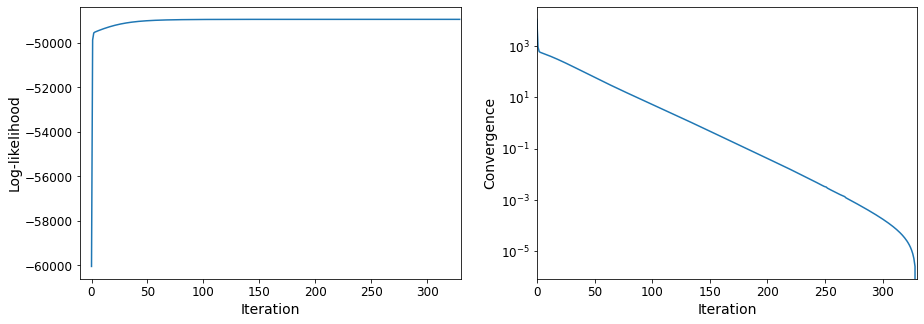

Estimated beta = 
[[-0.13109891 -0.14762396 -0.08434295 -0.08748261]
 [ 0.04789428  0.16045251  0.15670318  0.02867132]
 [ 1.31390373  1.03045748 -0.42402803  0.08309538]
 [ 1.1107557   0.94583784 -0.70946293  0.04390626]
 [ 1.21987134  0.96691712 -0.80819622 -0.07140339]]


In [5]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(llhs)
ax[0].set_ylabel('Log-likelihood', fontsize=14)
ax[0].set_xlabel('Iteration', fontsize=14)
ax[0].tick_params(labelsize=12)
ax[0].set_xlim(-10,330)

ax[1].plot(max(llhs)-llhs)
ax[1].set_ylabel('Convergence', fontsize=14)
ax[1].set_xlabel('Iteration', fontsize=14)
ax[1].tick_params(labelsize=12)
ax[1].set_yscale('log')
ax[1].set_xlim(0,330)
plt.show()
print('Estimated beta = ')
print(B)